In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys

In [4]:
sys.path.insert(0,'/home/gjones/Background-Subtraction-Library')

In [5]:
import pybgs

In [6]:
import cv2

In [8]:
bgs_params = { 
 'algorithm': 'prati_mediod_bgs', 
 'low': 30,
 'high': 30 * 2,
 'weight': 5,
 'sampling_rate': 5,
 'history_size': 8 }


In [153]:
import skvideo.io
bg_sub = pybgs.BackgroundSubtraction()


In [100]:
def get_subsample(fn,decimation_factor=60,max_frames=1000):
    camera_source = skvideo.io.VideoCapture(fn)
    k = 0
    frames = []
    while True:
        err,img = camera_source.read()
        if not err:
            break
        k+=1
        if k % decimation_factor == 0:
            frames.append(img)
            if len(frames) >= max_frames:
                break
    camera_source.release()
    return np.array(frames)

In [222]:
frames = get_subsample('/artemis/fts/test4.mp4',decimation_factor=4,max_frames=10000)

In [223]:
frames.shape

(3750, 480, 640, 3)

In [224]:
skvideo.io.VideoCapture??

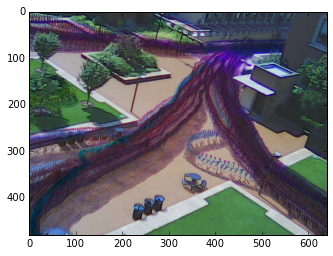

In [225]:
imshow((np.min(frames,0)).astype('uint8'))

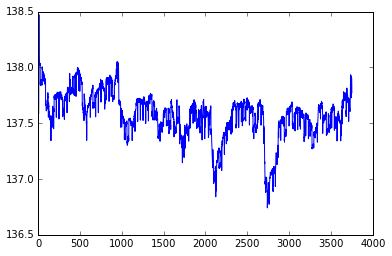

In [226]:
plot(frames.mean(1).mean(1).mean(1))

In [96]:
err

True

In [10]:
camera_source = skvideo.io.VideoCapture('/artemis/fts/test2.mp4')

In [16]:
imgs = []
for k in range(500):
    err,img = camera_source.read()
    imgs.append(img)
imgs = np.array(imgs)

In [12]:
imgs.shape

(500, 240, 320, 3)

In [23]:
imgs.dtype

dtype('uint8')

In [163]:
frames.shape

(250, 480, 640, 3)

In [164]:
img.shape

(480, 640, 3)

In [227]:
bg_sub = pybgs.BackgroundSubtraction()
bg_sub.init_model(frames[0],bgs_params)

In [228]:
high_threshold_mask = np.zeros(shape=frames.shape[1:3], dtype=np.uint8)
low_threshold_mask = np.zeros_like(high_threshold_mask)

In [229]:
output_masks = np.zeros(shape=frames.shape[:-1],dtype=np.uint8)

In [230]:
for i in range(frames.shape[0]):
    img = frames[i]
    bg_sub.subtract(i, img, low_threshold_mask, high_threshold_mask)
    bg_sub.update(i, img, high_threshold_mask)
    output_masks[i,:,:] = low_threshold_mask

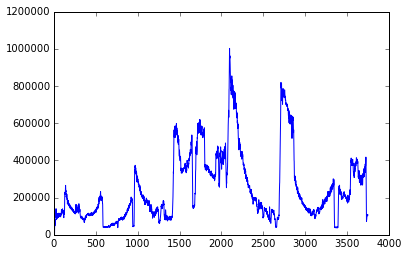

In [231]:
plot(output_masks.sum(1).sum(1))

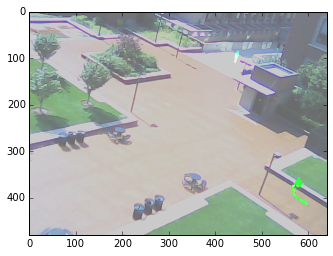

In [233]:
frame = 145
alpha = np.zeros(shape=(img.shape[0],img.shape[1],4),dtype='uint8')
alpha[:,:,:-1] = frames[frame]
alpha[:,:,-1] = output_masks[frame]
alpha[output_masks[frame].astype('bool'),1] = 255

alpha[~output_masks[frame].astype('bool'),-1] = 180
imshow(alpha)

/data/home/gjones/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


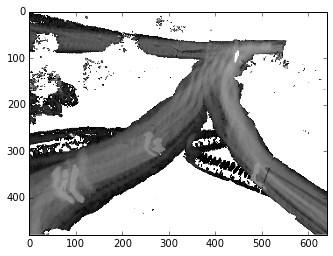

In [234]:
imshow(np.log10(output_masks.sum(0)),cmap=cm.gray)

/data/home/gjones/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


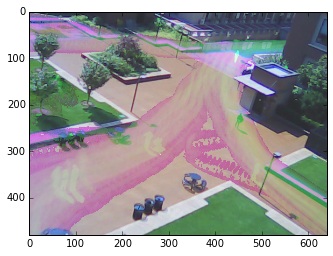

In [235]:
bg = frames[210].copy()
avg = np.log10(output_masks.sum(0,dtype='float'))
avg = avg*255/avg.max()
bg[np.isfinite(avg),1] = avg[np.isfinite(avg)]
imshow(bg,cmap=cm.gray)

In [186]:
import cv2

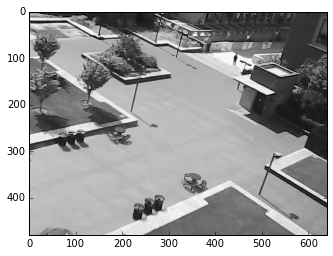

In [236]:
imshow(cv2.cvtColor(frames[0],cv2.COLOR_RGB2GRAY)[:,:],cmap=cm.gray)

In [197]:
output_masks.shape

(250, 480, 640)

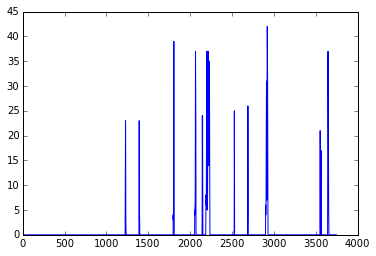

In [249]:
plot(output_masks[:,:,300].sum(1)/255.)

In [237]:
np.flatnonzero(output_masks[:,:,300].sum(1))

array([1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1389, 1390,
       1391, 1392, 1393, 1394, 1395, 1396, 1797, 1798, 1799, 1800, 1801,
       1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 2054, 2055, 2056,
       2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067,
       2068, 2069, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151,
       2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197,
       2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208,
       2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219,
       2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230,
       2231, 2232, 2233, 2526, 2527, 2528, 2529, 2530, 2686, 2687, 2688,
       2689, 2690, 2691, 2692, 2693, 2901, 2902, 2903, 2904, 2905, 2906,
       2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917,
       2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928,
       2929, 3551, 3552, 3553, 3554, 3555, 3556, 35

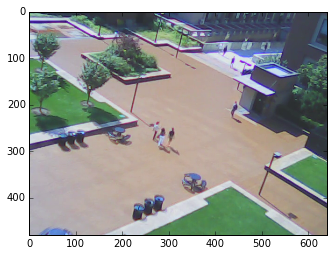

In [248]:
imshow(frames[2200])

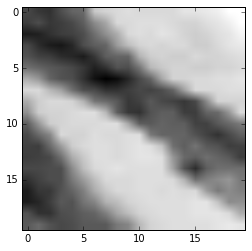

In [247]:
imshow(output_masks[2190:2210,:,290:310].sum(1),cmap=cm.gray_r)

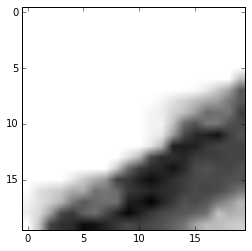

In [245]:
imshow(output_masks[3630:3650,:,290:310].sum(1),cmap=cm.gray_r)

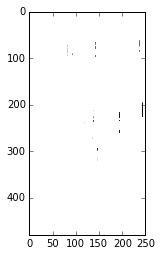

In [201]:
imshow(output_masks[:,:,300].T,cmap=cm.gray_r)

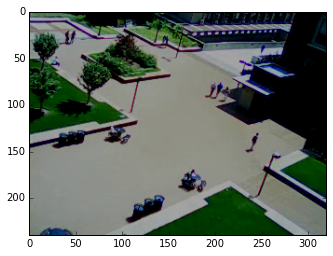

In [94]:
imshow(imgs[110])

In [88]:
avg.max()

4.7682680164515476

In [56]:
imgs.shape

(500, 240, 320, 3)

In [62]:
np.rollaxis?

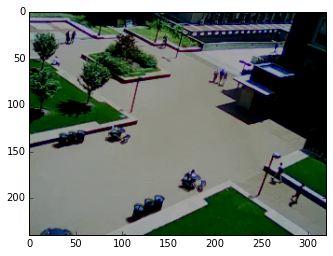

In [75]:
imshow(imgs[0])